In [1]:
import altair as alt
import pandas as pd
import numpy as np
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Exploratory data analysis of Crime in Vancouver #

The data set used in this project comes from **the Vancouver Open Data Catalogue**. It includes 529.652 crimes reported between January 1, 2003 to July 13, 2017. The data set is also avialable on <https://www.kaggle.com/wosaku/crime-in-vancouver>

## Peak of the data ##

In [2]:
data = pd.read_csv('../data/raw/crime.csv')
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
print(f"The Dataset has {data.shape[0]} rows and {data.shape[1]} variables ")

The Dataset has 530652 rows and 12 variables 


In [4]:
# data.info()

In [5]:
# print('Missing values for HOUR, MINUTE, HUNDRED_BLOCK, NEIGHBORHOOD')
print(f"Vancouver has {data['NEIGHBOURHOOD'].nunique()} neighborhoods, and they are")

Vancouver has 24 neighborhoods, and they are


In [6]:
data['NEIGHBOURHOOD'].unique()

array(['Strathcona', 'Kerrisdale', 'Dunbar-Southlands',
       'Grandview-Woodland', 'Sunset', 'West End', nan,
       'Central Business District', 'Hastings-Sunrise',
       'Victoria-Fraserview', 'Fairview', 'Kensington-Cedar Cottage',
       'West Point Grey', 'Shaughnessy', 'Renfrew-Collingwood',
       'Killarney', 'Riley Park', 'Arbutus Ridge', 'Musqueam',
       'Mount Pleasant', 'Kitsilano', 'Stanley Park', 'South Cambie',
       'Marpole', 'Oakridge'], dtype=object)

In [7]:
print(f"dataset has information for {data['YEAR'].nunique()} years. From {data['YEAR'].unique().min()} to {data['YEAR'].unique().max()}")

dataset has information for 15 years. From 2003 to 2017


In [8]:
numerics = data.select_dtypes(include=np.number).columns.tolist()

#data[numerics].describe()

In [9]:
# print('We need data preproccessing')

## Explore trends, relationships and more ##

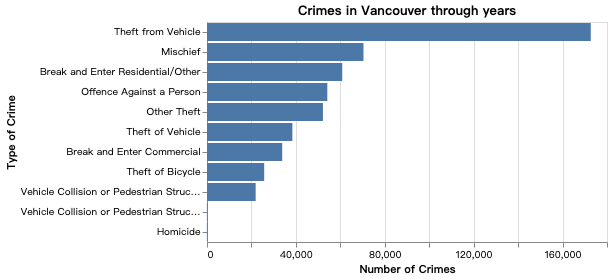

In [10]:
alt.Chart(data, title='Crimes in Vancouver through years').mark_bar().encode(
    y=alt.Y('TYPE', sort='-x', title='Type of Crime'),
    x=alt.X('count()', title='Number of Crimes'))

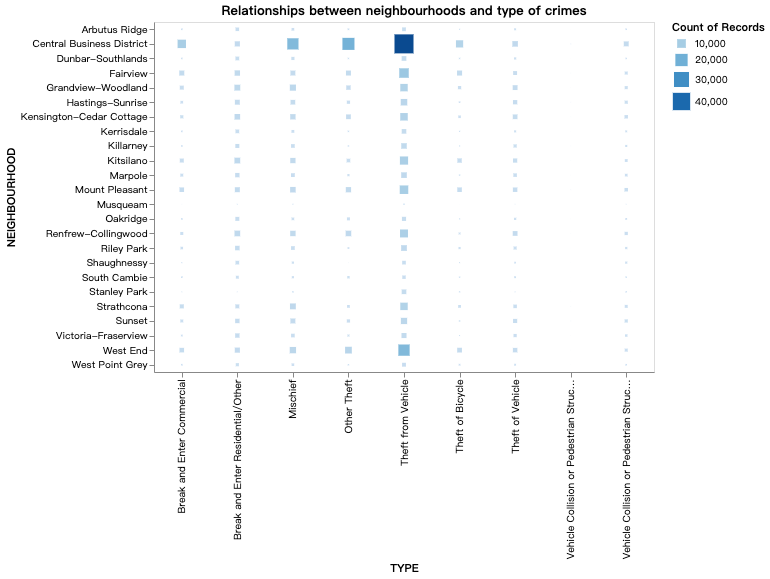

In [11]:
alt.Chart(data.dropna(), 
          title = "Relationships between neighbourhoods and type of crimes"
         ).mark_square().encode(
    x='TYPE',
    y='NEIGHBOURHOOD',
    color='count()',
    size='count()').properties(
    width=500,
    height=350
)

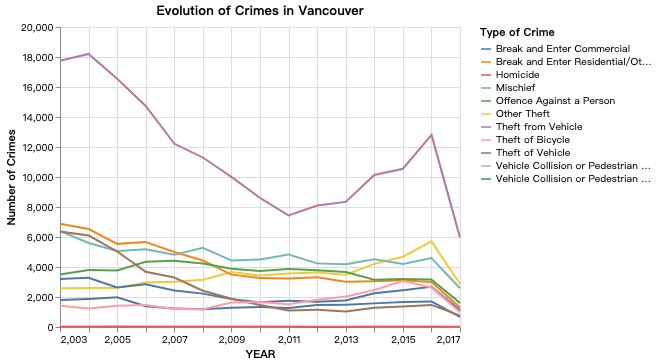

In [12]:
alt.Chart(data,title ='Evolution of Crimes in Vancouver').mark_line().encode(
    x=alt.X('YEAR'),
    y=alt.Y('count(YEAR)', title ='Number of Crimes'),
    color=alt.Color('TYPE', title='Type of Crime'))

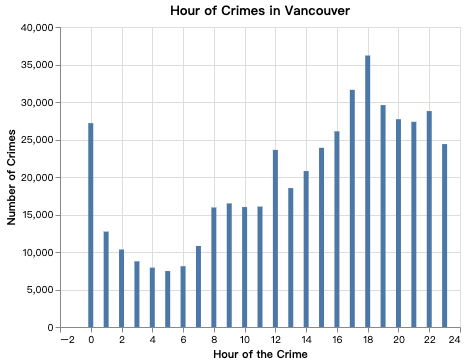

In [13]:
alt.Chart(data, title='Hour of Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('HOUR', title='Hour of the Crime', scale=alt.Scale(domain=(0, 23))),
    y=alt.Y('count()', title='Number of Crimes'))

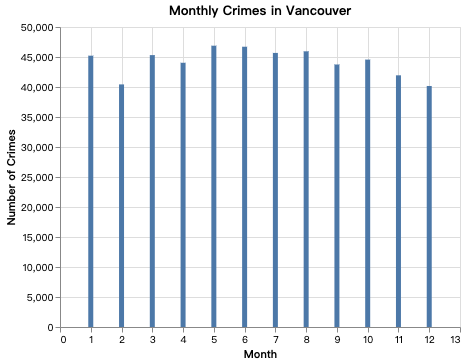

In [14]:
alt.Chart(data, title='Monthly Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('MONTH', title='Month'),
    y=alt.Y('count()', title='Number of Crimes'))

In [15]:
# data['HUNDRED_BLOCK'].nunique()

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R
library(tidyverse)
library(knitr)
library(ggridges)
library(ggthemes)
library(ggplot2)
theme_set(theme_gray(base_size = 18))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [18]:
%%R
crime_data <- read.csv("../data/raw/crime.csv")

Below table shows the type of crime with its reported times, as well as percentage

In [19]:
%%R
type_crime <- crime_data |> 
  group_by(TYPE) |> 
  summarise(Count = n()) |> 
  mutate(Percentage=paste0(round(Count/sum(Count)*100,2),"%")) |> 
  arrange(desc(Count))
type_crime

# A tibble: 11 × 3
   TYPE                                                    Count Percentage
   <chr>                                                   <int> <chr>     
 1 Theft from Vehicle                                     172700 32.54%    
 2 Mischief                                                70413 13.27%    
 3 Break and Enter Residential/Other                       60862 11.47%    
 4 Offence Against a Person                                54142 10.2%     
 5 Other Theft                                             52167 9.83%     
 6 Theft of Vehicle                                        38418 7.24%     
 7 Break and Enter Commercial                              33845 6.38%     
 8 Theft of Bicycle                                        25730 4.85%     
 9 Vehicle Collision or Pedestrian Struck (with Injury)    21901 4.13%     
10 Vehicle Collision or Pedestrian Struck (with Fatality)    254 0.05%     
11 Homicide                                                  220 0.04

**By visualization**

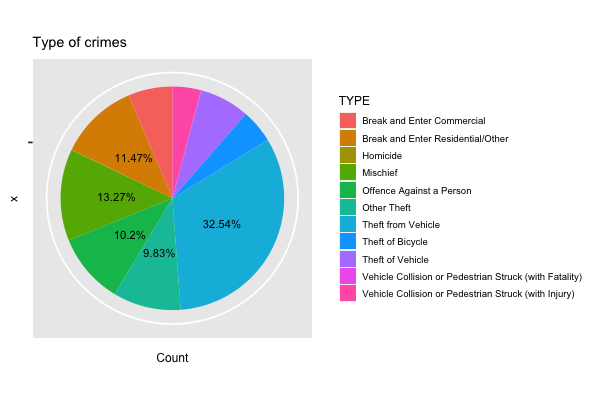

In [20]:
%%R -w 600 -h 400
ggplot(type_crime, aes(x = "", y = Count, fill = TYPE)) +
  geom_col() +
  geom_text(aes(label = ifelse(Count > 50000, Percentage, "")),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE,
            size = 4) +
  coord_polar(theta = "y") +
  scale_y_discrete() +
  theme(text = element_text(size = 12)) +
  ggtitle("Type of crimes")

**Below table and visualization show the number of crimes per neighbourhood**

In [21]:
%%R
# Count Neighbourhood with most crimes
neighbour_crime <- crime_data |> 
  group_by(NEIGHBOURHOOD) |> 
  summarize(Count = n()) |> 
  arrange(desc(Count))

neighbour_crime[-c(2),] # Remove crime without Neighbourhood data

# A tibble: 24 × 2
   NEIGHBOURHOOD              Count
   <chr>                      <int>
 1 Central Business District 110947
 2 West End                   41352
 3 Fairview                   32161
 4 Mount Pleasant             30536
 5 Grandview-Woodland         27180
 6 Renfrew-Collingwood        26761
 7 Kitsilano                  26699
 8 Kensington-Cedar Cottage   24941
 9 Strathcona                 20919
10 Hastings-Sunrise           18126
# … with 14 more rows


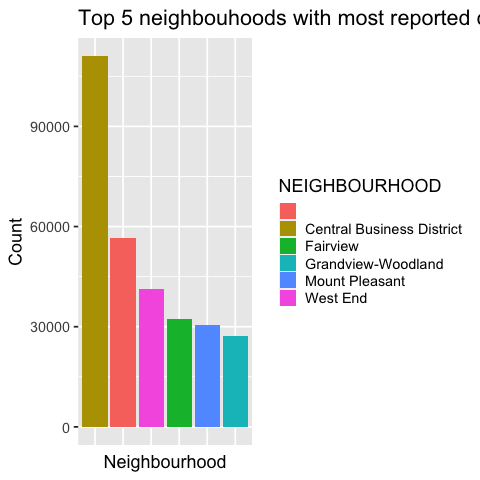

In [22]:
%%R
top_5_district <- head(neighbour_crime)
ggplot(top_5_district) +
  geom_bar(aes(x = reorder(NEIGHBOURHOOD, -Count),
               y = Count, fill=NEIGHBOURHOOD), 
           stat = "identity") +
  theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank()) +
  xlab("Neighbourhood") +
  ggtitle("Top 5 neighbouhoods with most reported crimes")